In [ ]:
pip install EoN

     |████████████████████████████████| 113 kB 19.8 MB/s 
  Created wheel for EoN: filename=EoN-1.1-py3-none-any.whl size=120819 sha256=8cb2935a6379c6100838e38d5167e7528fa6914852a82ef656f912eae0556851
  Stored in directory: /root/.cache/pip/wheels/0b/c0/a4/d6001fd809cb84c027ada5c2ab3b6d1cb2e97fec3f9978eae7
Successfully built EoN


In [ ]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython import display
import random 

Generamos nuestra gráfica  G
simulación de Gillespie 


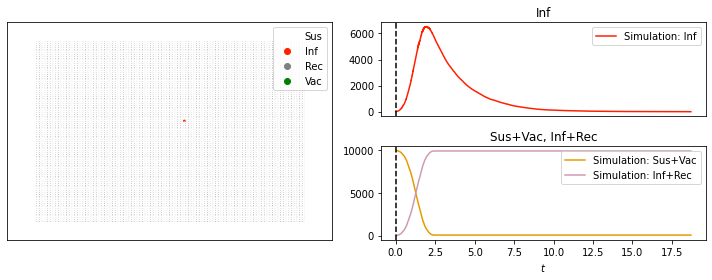

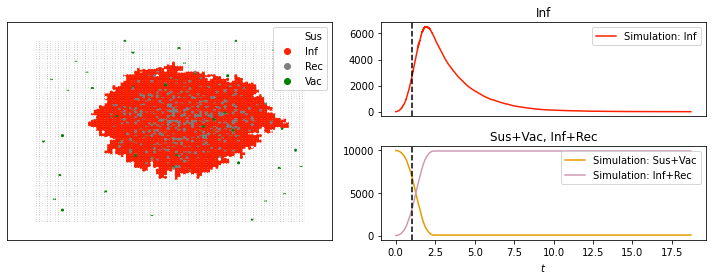

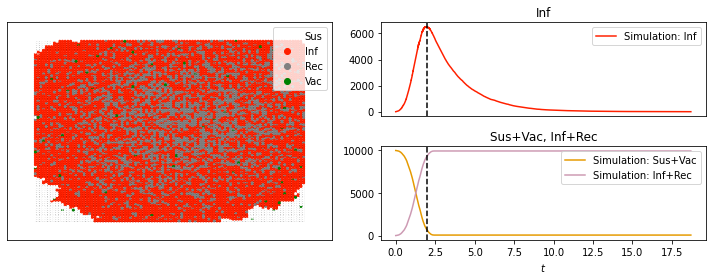

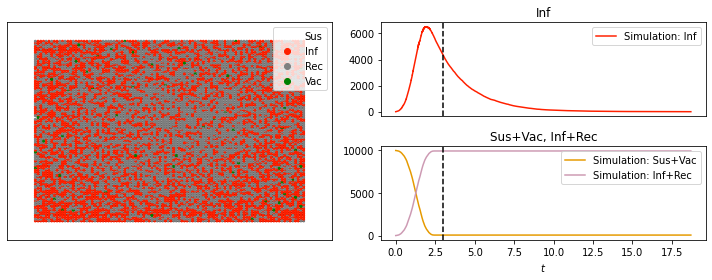

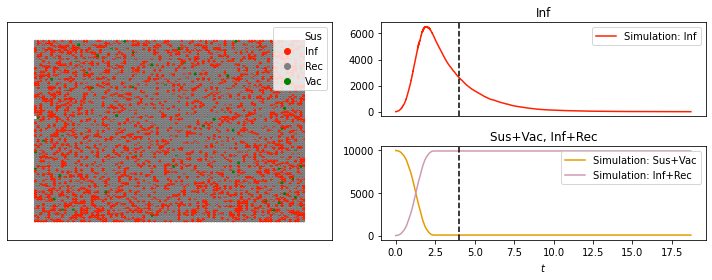

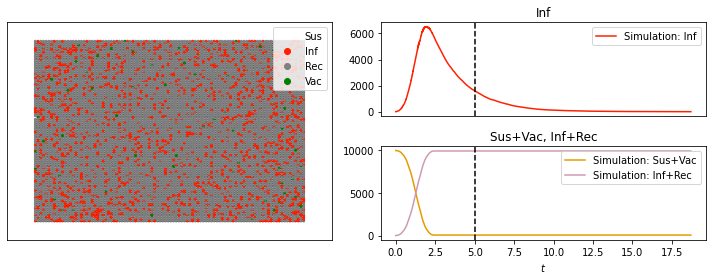

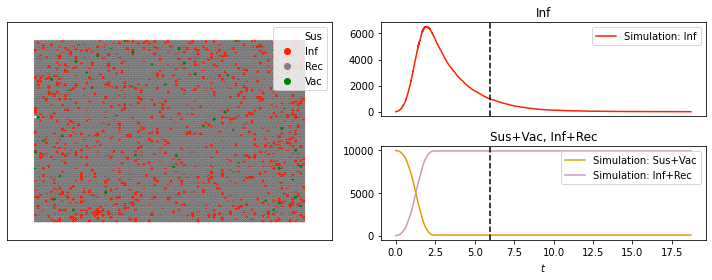

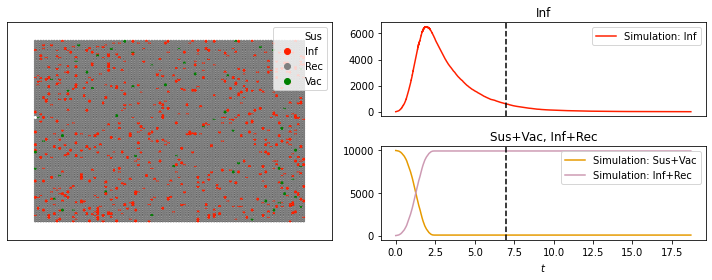

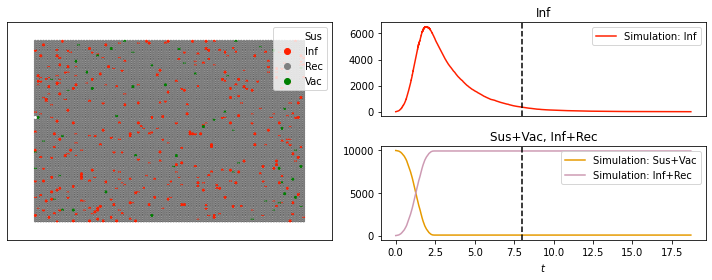

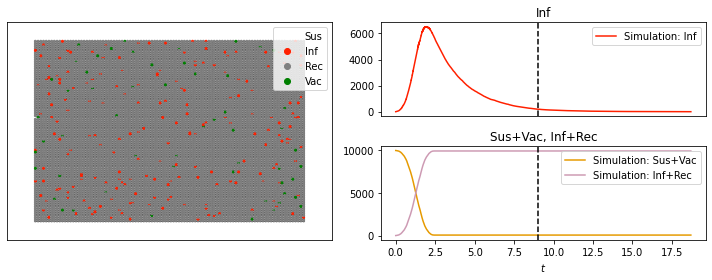

In [ ]:
#Modelamos  una  simulación de Gillespie  con automatas celulares
print('Generamos nuestra gráfica  G')
G = nx.grid_2d_graph(100,100) #Genera una malla de 100 por 1000
#Podemos cambiar en donde empieza la infección
initial_infections = [(u,v) for (u,v) in G if u==55 and v==55]
H = nx.DiGraph() 
#H.add_edge('Sus', 'Vac', rate = np.random.rand()) #Ponemos la tasa de vacunación
H.add_edge('Sus', 'Vac', rate = 0.005) #Ponemos la tasa de vacunación
#H.add_edge('Inf', 'Rec', rate = np.random.rand() )  #Ponemos la tasa de recuperación
H.add_edge('Inf', 'Rec', rate = 0.5)  #Ponemos la tasa de recuperación
J = nx.DiGraph() 
#J.add_edge(('Inf', 'Sus'), ('Inf', 'Inf'), rate = 100*np.random.rand()) # Ponemos la tasa de infección
J.add_edge(('Inf', 'Sus'), ('Inf', 'Inf'), rate = 15) # Ponemos la tasa de infección
IC = defaultdict(lambda:'Sus')  # Diccionario con valores iniciales de susceptible 
for node in initial_infections:
  IC[node] = 'Inf'
return_statuses = ['Sus', 'Inf', 'Rec', 'Vac']
color_dict = {'Sus': 'white','Inf':'#ff2000','Rec':'gray','Vac': 'green'}
pos = {node:node for node in G}
tex = False
sim_kwargs = {'color_dict':color_dict,'pos':pos, 'tex':tex}
print('simulación de Gillespie ')
sim = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax=30,
return_full_data=True, sim_kwargs=sim_kwargs) #LLamamos a la paquetría poderosa que hará todo
times, D = sim.summary() #Diccionario de cada tiempo discreto, donde sus llaves son  las entradas 
#en  return_statuses y los valores son arreglos del tiempo actual

newD = {'Sus+Vac':D['Sus']+D['Vac'], 'Inf+Rec' : D['Inf'] + D['Rec']}
#newD nuevo diccionario donde dado un número de no infectados , o el número de infectados
#Hacemos una serie de tiempo
new_timeseries = (times, newD)
sim.add_timeseries(new_timeseries, label = 'Simulation',
color_dict={'Sus+Vac':'#E69A00', 'Inf+Rec':'#CD9AB3'})
#Lo iteramos N veces para ver el resultado de la simulación en cada tiempo
for i in range(0,10):
  sim.display(time=i, node_size = 4, ts_plots=[['Inf'], ['Sus+Vac', 'Inf+Rec']])

plt.show()


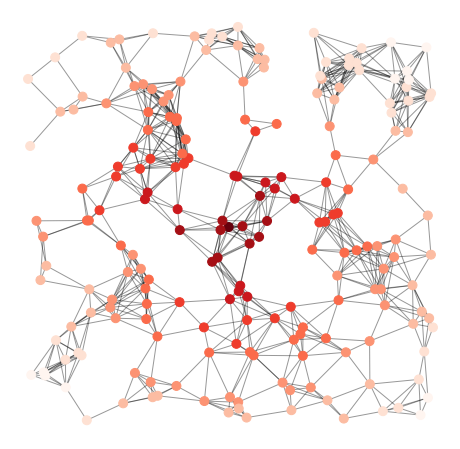

In [ ]:
# Use seed when creating the graph for reproducibility
G3= nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G3, "pos")

# Encontramos un aproximado de el centro
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G3, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G3, pos, alpha=0.4)
nx.draw_networkx_nodes(
    G3,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

doing Gillespie simulation
done with simulation, now plotting


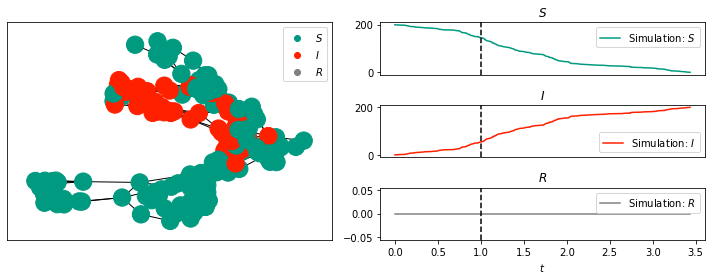

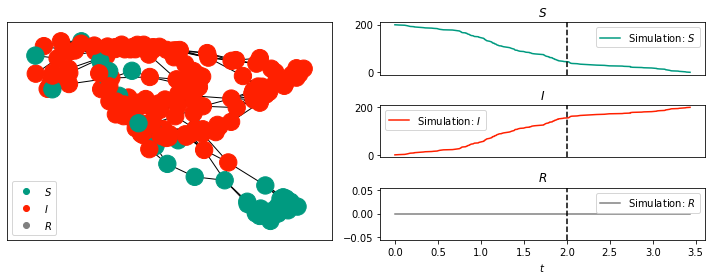

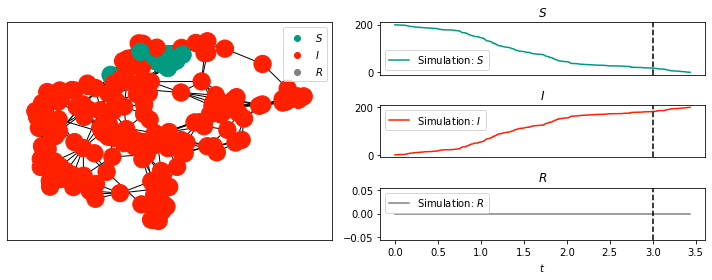

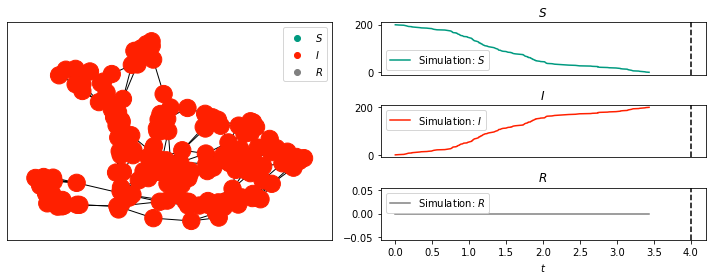

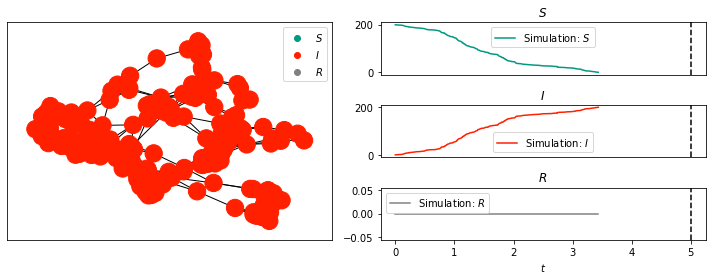

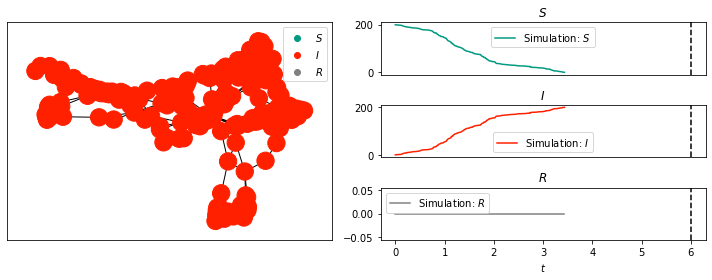

In [ ]:
G1 = nx.karate_club_graph()
#nx_kwargs = {'with_labels':True} #optional arguments to be passed on to the
#networkx plotting command.
print('doing Gillespie simulation')
sim = EoN.Gillespie_SIR(G3, 1, 0, return_full_data=True)
#sim2=EoN.Gillespie_simple_contagion(G3,1,0.5,return_statuses=True)
print('done with simulation, now plotting')
for i in range(1,7):
  sim.display(time = i) #plot at time 1.
plt.show()

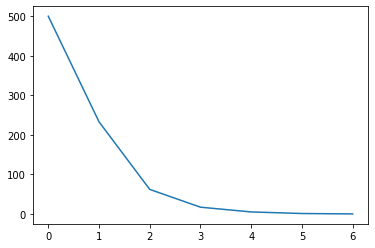

In [ ]:
G = nx.fast_gnp_random_graph(1000,0.002)
t, S, I, R = EoN.discrete_SIR(G, args = (0.6,),
                                    initial_infecteds=range(500))
plt.plot(t,I)



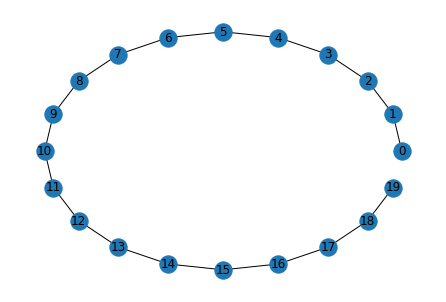

In [ ]:
G4 = nx.path_graph(20)
pos = nx.circular_layout(G4)
nx.draw_circular(G4,with_labels=True)

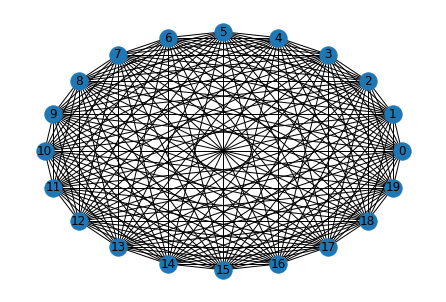

In [ ]:
G5=nx.complete_graph(20)
nx.draw_circular(G5,with_labels=True)

Simulación de Gillespie


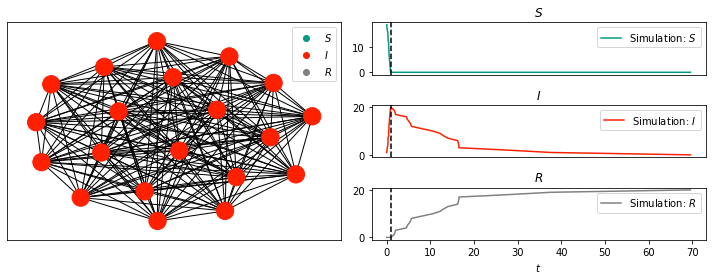

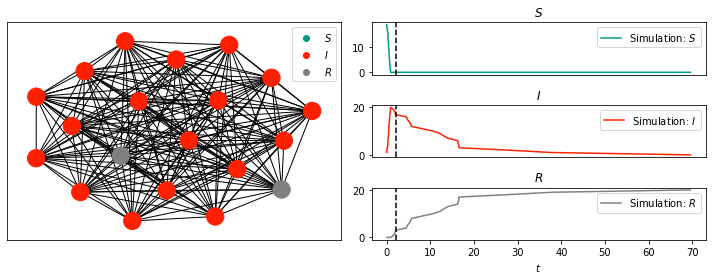

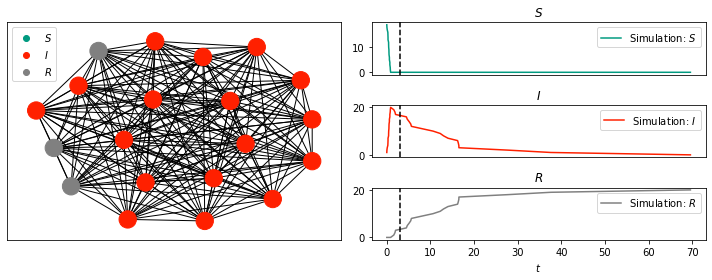

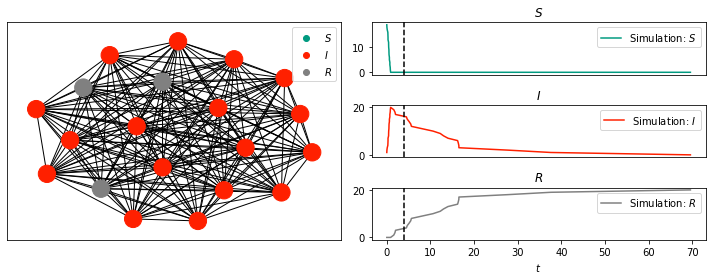

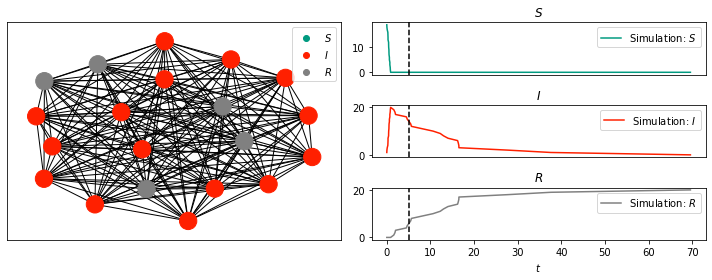

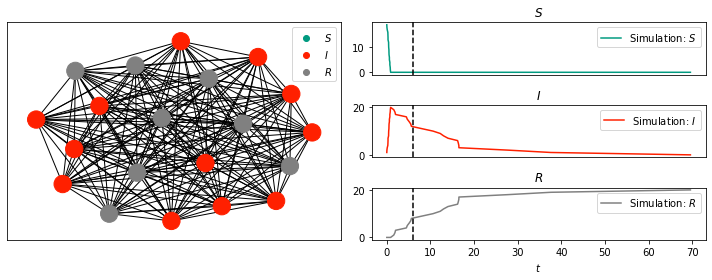

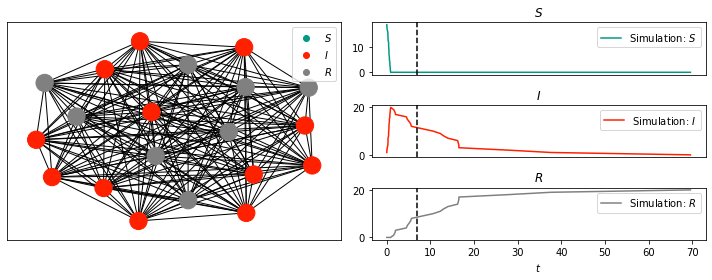

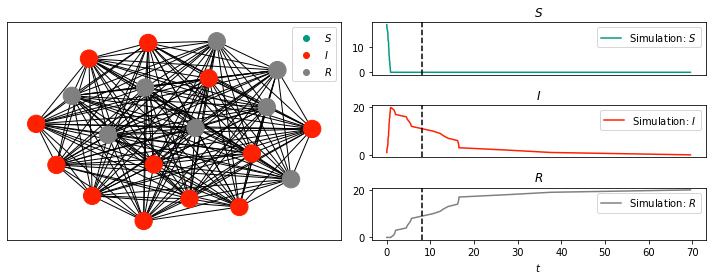

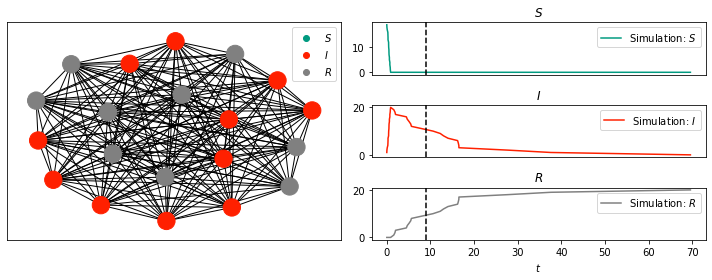

In [ ]:
print('Simulación de Gillespie')
sim = EoN.Gillespie_SIR(G5, 0.3, 0.1, return_full_data=True)

for i in range(1,10):
  sim.display(time = i) 
plt.show()

doing Gillespie simulation
done with simulation, now plotting


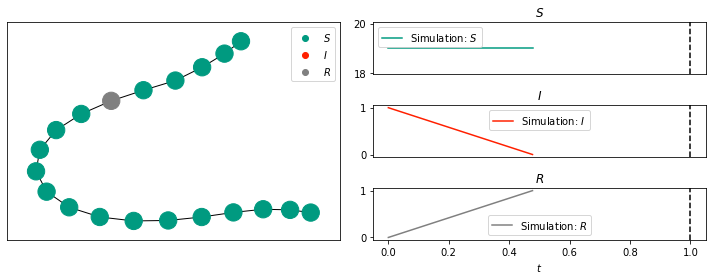

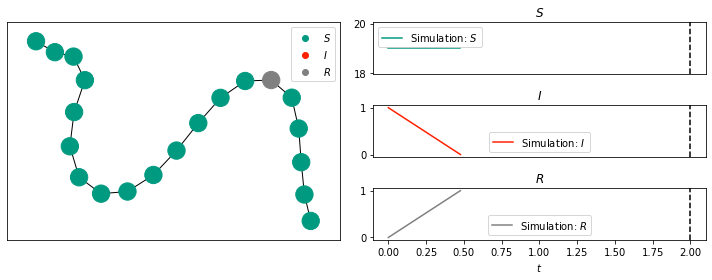

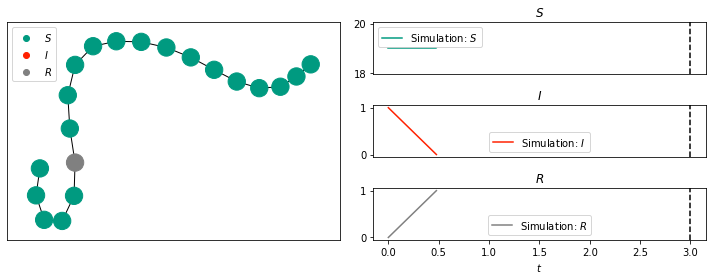

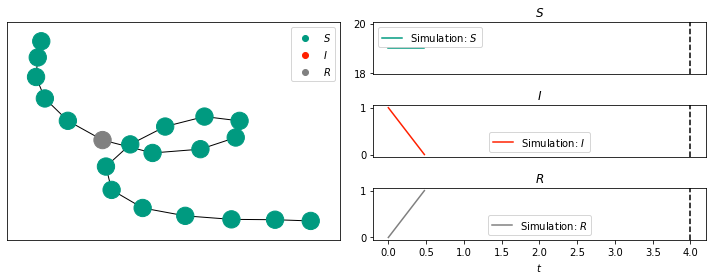

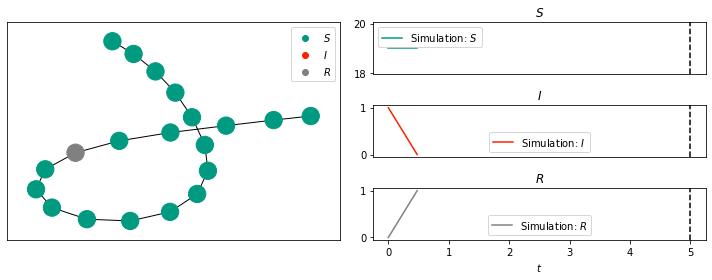

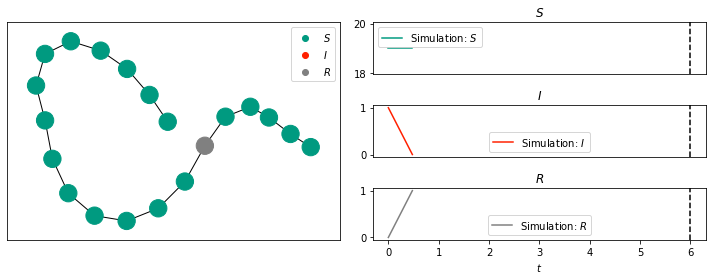

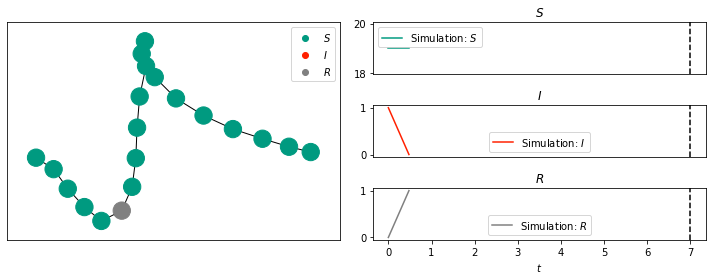

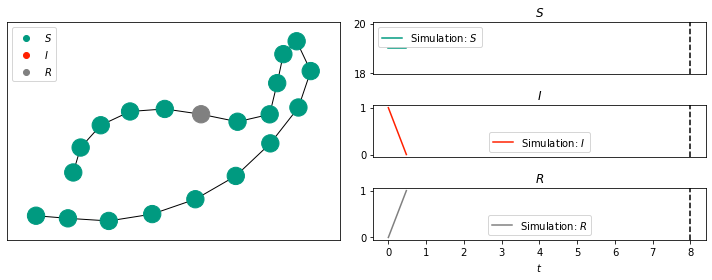

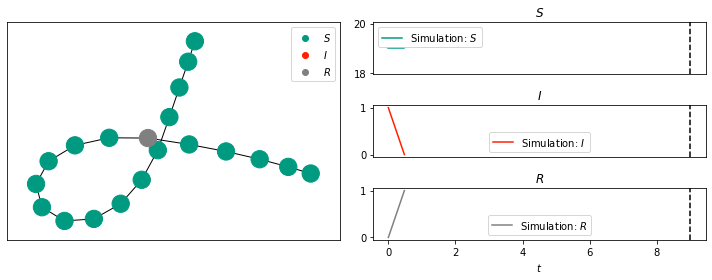

In [ ]:
print('doing Gillespie simulation')
sim = EoN.Gillespie_SIR(G4, 0.3, 0.7, return_full_data=True)
#sim2=EoN.Gillespie_simple_contagion(G3,1,0.5,return_statuses=True)
print('done with simulation, now plotting')
for i in range(1,10):
  sim.display(time = i) #plot at time 1.
plt.show()

doing Gillespie simulation
done with simulation, now plotting


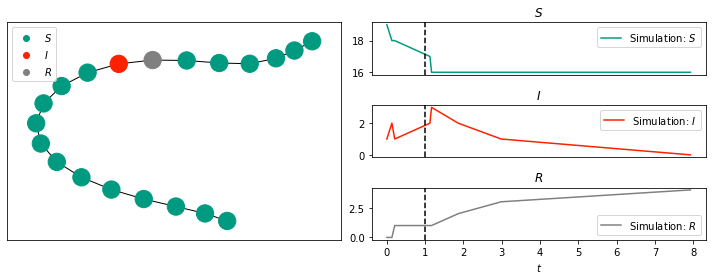

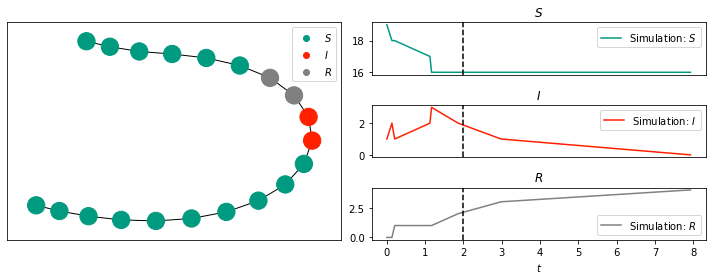

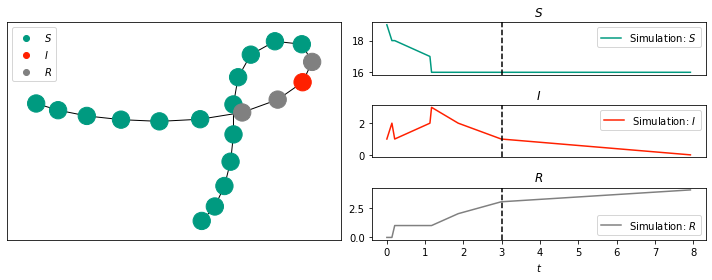

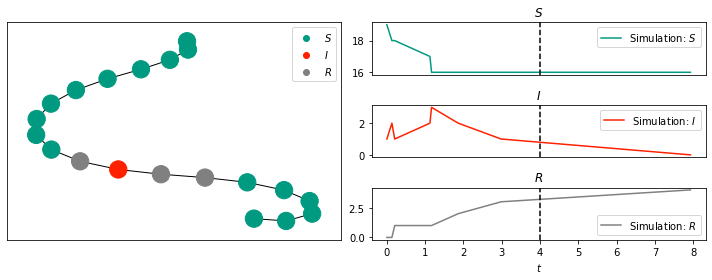

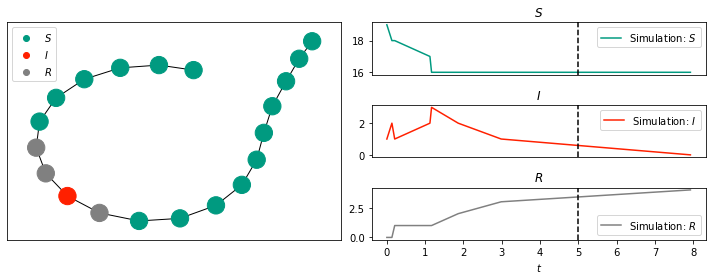

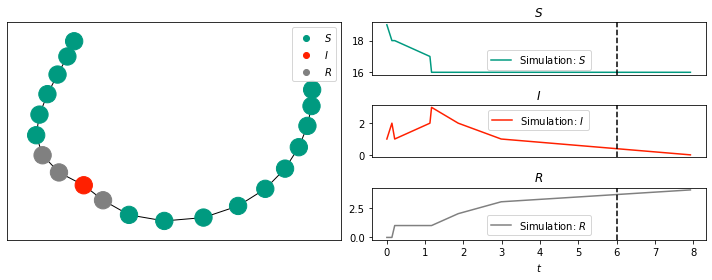

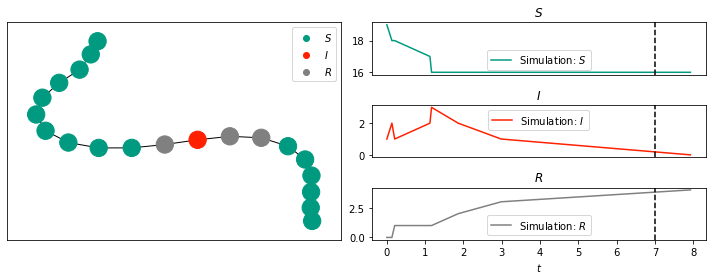

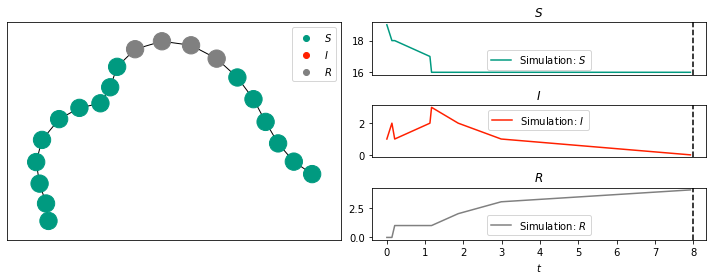

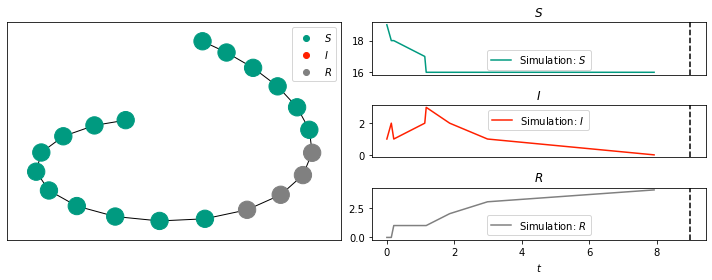

In [ ]:
print('doing Gillespie simulation')
sim = EoN.Gillespie_SIR(G4, 0.5, 0.5, return_full_data=True)
#sim2=EoN.Gillespie_simple_contagion(G3,1,0.5,return_statuses=True)
print('done with simulation, now plotting')
for i in range(1,10):
  sim.display(time = i) #plot at time 1.
plt.show()